In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
folder_path = '/content/drive/My Drive/GT/cs6220/Analysis/Competition' # Change the path to the folder where the assignment is stored in Google Drive.

# Files in the folder -
os.listdir(folder_path)

os.chdir(folder_path)

print('Current working directory -', os.getcwd())

Mounted at /content/drive
Current working directory - /content/drive/My Drive/GT/cs6220/Analysis/Competition


In [3]:
llema_file_path = "llemma_competition_math_extracted_answers_2.txt"

mistral_file_path = "Mistral_Inference_Competition_Dataset.csv"

llama_file_path = "inference_llama3_competition_math.csv"

qwen_file_path = "inference_QWEN_competition_math.csv"

In [4]:
import pandas as pd
from datasets import load_dataset, DatasetDict, Dataset
import matplotlib.pyplot as plt
import numpy as np

competition_math_dict = load_dataset("jeggers/competition_math", "original")
test_dataset = competition_math_dict["test"]
test_dataset_df = pd.DataFrame(test_dataset)
test_dataset_df["row_index"] = test_dataset_df.index

def format_llema_inference_competition_math():
    with open(llema_file_path, "r") as file:
        data = [eval(line.strip()) for line in file]
    df = pd.DataFrame(data)
    llema_test_dataset= df.merge(test_dataset_df, left_on='Iteration', right_on='row_index')
    llema_test_dataset["level:type"] = llema_test_dataset["level"] + ": " + llema_test_dataset["type"]

    llema_test_dataset["llema_is_correct"] =  (llema_test_dataset["Final Solution"] == llema_test_dataset["extracted_solution"])

    llema_test_dataset = llema_test_dataset.rename(columns={"Final Solution": "llema_solution"})

    llema_3_results = llema_test_dataset[["row_index", "level", "type", "llema_is_correct", "llema_solution"]]
    return llema_3_results

def format_mistral_inference_competition_math():
    df = pd.read_csv(mistral_file_path)
    mistral_test_dataset= df.merge(test_dataset_df, left_on='row_index', right_on='row_index')
    mistral_test_dataset["mistral_is_correct"] = (mistral_test_dataset["Run_1"] == mistral_test_dataset["extracted_solution"])
    mistral_test_dataset["level:type"] = mistral_test_dataset["level"] + ": " + mistral_test_dataset["type"]

    mistral_test_dataset = mistral_test_dataset.rename(columns={"Run_1": "mistral_solution"})

    mistral_results = mistral_test_dataset[["row_index", "level", "type", "mistral_is_correct", "mistral_solution"]]
    return mistral_results

def format_llama_inference_competition_math():
    df = pd.read_csv(llama_file_path)
    llama3_test_dataset= df.merge(test_dataset_df, left_on='row_index', right_on='row_index')
    llama3_test_dataset["llama3_is_correct"] = (llama3_test_dataset["Run_1"] == llama3_test_dataset["extracted_solution"])
    llama3_test_dataset["level:type"] = llama3_test_dataset["level"] + ": " + llama3_test_dataset["type"]

    llama3_test_dataset = llama3_test_dataset.rename(columns={"Run_1": "llama_solution"})

    llama3_results = llama3_test_dataset[["row_index", "level", "type", "llama3_is_correct", "llama_solution"]]
    return llama3_results

def format_qwen_inference_competition_math():
    df = pd.read_csv(qwen_file_path)

    qwen_test_dataset= df.merge(test_dataset_df, left_on='row_index', right_on='row_index')
    qwen_test_dataset["qwen_is_correct"] = (qwen_test_dataset["Run_1"] == qwen_test_dataset["extracted_solution"])
    qwen_test_dataset["level:type"] = qwen_test_dataset["level"] + ": " + qwen_test_dataset["type"]

    qwen_test_dataset = qwen_test_dataset.rename(columns={"Run_1": "qwen_solution"})

    qwen_results = qwen_test_dataset[["row_index", "level", "type", "level:type", "qwen_is_correct", "qwen_solution"]]
    return qwen_results

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.94k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.04M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.88M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [5]:
llama3_results = format_llama_inference_competition_math()
llema_results = format_llema_inference_competition_math()
qwen_results = format_qwen_inference_competition_math()
mistral_results = format_mistral_inference_competition_math()

# Check where all the answers correct column is True
# i.e. all models got the answer correct
all_results = ((llama3_results.merge(llema_results)).merge(qwen_results)).merge(mistral_results)
all_results["all_correct"] = (all_results["llama3_is_correct"] == True) & (all_results["llema_is_correct"] == True) & (all_results["qwen_is_correct"] == True) & (all_results["mistral_is_correct"]==True)

all_results["all_incorrect"] = (all_results["llama3_is_correct"] == False) & (all_results["llema_is_correct"] == False) & (all_results["qwen_is_correct"] == False) & (all_results["mistral_is_correct"]==False)

all_results["at_least_3_correct"] = (
    all_results[["llama3_is_correct", "llema_is_correct", "qwen_is_correct", "mistral_is_correct"]]
    .sum(axis=1) >= 3
)
all_results["at_least_2_correct"] = (
    all_results[["llama3_is_correct", "llema_is_correct", "qwen_is_correct", "mistral_is_correct"]]
    .sum(axis=1) >= 2
)

all_results["at_least_1_correct"] = (
    all_results[["llama3_is_correct", "llema_is_correct", "qwen_is_correct", "mistral_is_correct"]]
    .sum(axis=1) >= 1
)


# Check wehere all answers solution column have the same answer
# i.e. all models got the same answer
all_results["all_agree"] = (
    (all_results["llema_solution"] == all_results["llama_solution"]) &
    (all_results["qwen_solution"] == all_results["llama_solution"]) &
    (all_results["mistral_solution"] == all_results["llama_solution"]) &
    (all_results["llema_solution"] != "Error Parsing Response")
)

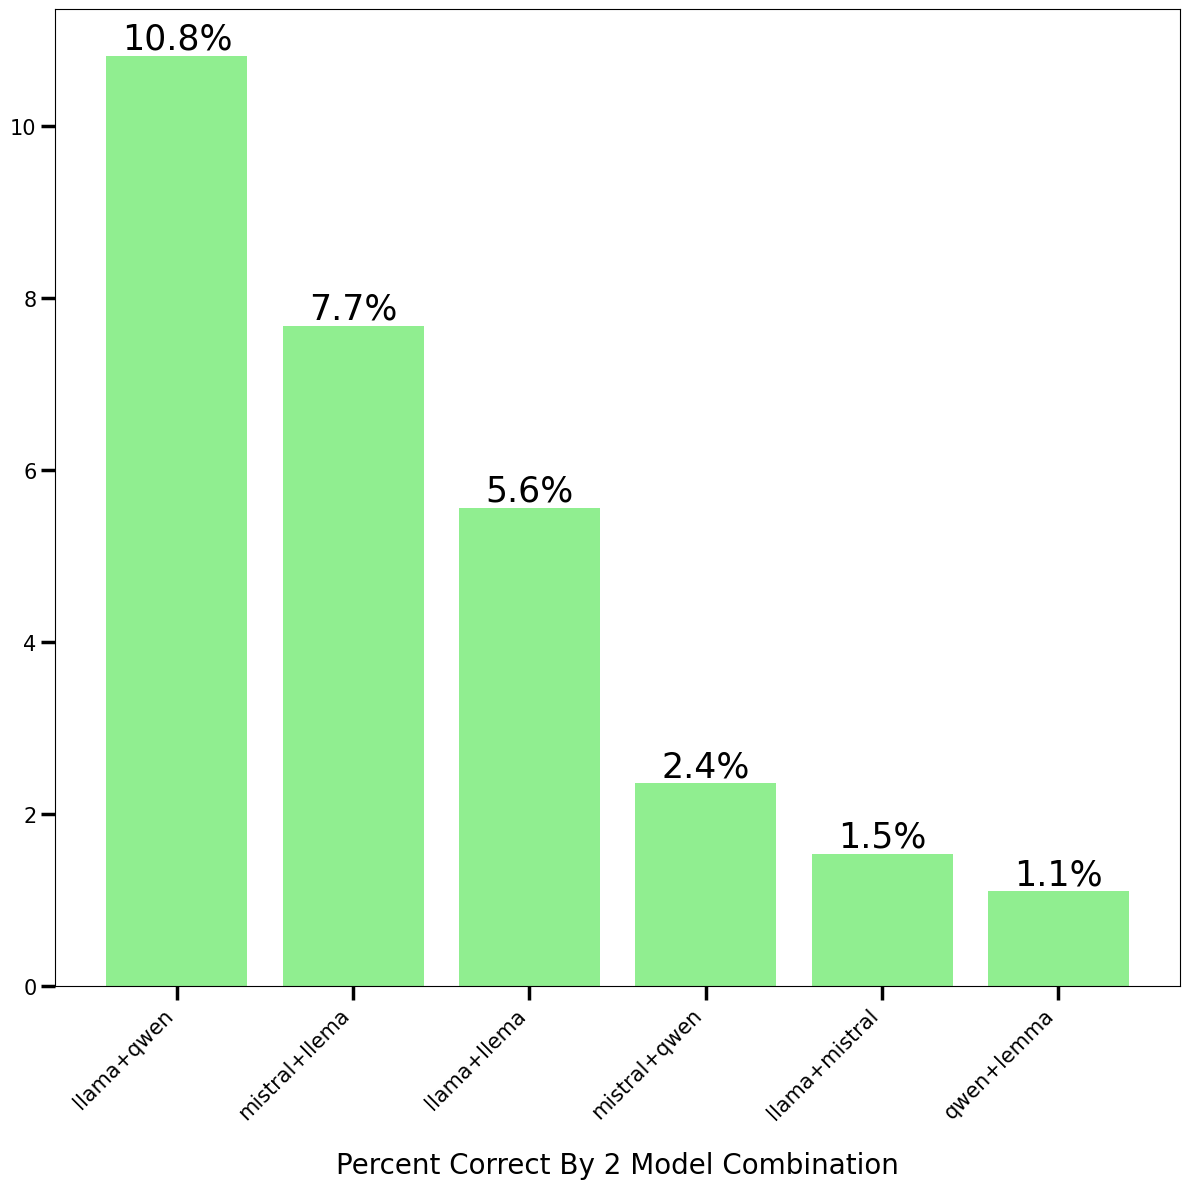

In [6]:
'''
Llama + Mistral
Llama + Qwen
Llama + Llema
Mistral + Qwen
Mistral + Llema
Qwen + Llema
'''
llamaplusmistral = all_results[(all_results["llama3_is_correct"] == True) & (all_results["mistral_is_correct"] == True)]


llamaplusqwen = all_results[(all_results["llama3_is_correct"] == True) & (all_results["qwen_is_correct"] == True)]


llamaplusllema = all_results[(all_results["llama3_is_correct"] == True) & (all_results["llema_is_correct"] == True)]


mistralplusqwen = all_results[(all_results["mistral_is_correct"] == True) & (all_results["qwen_is_correct"] == True)]


mistralplusllema = all_results[(all_results["mistral_is_correct"] == True) & (all_results["llema_is_correct"] == True)]


qwenpluslemma = all_results[(all_results["qwen_is_correct"] == True) & (all_results["llema_is_correct"] == True)]



accuracies = pd.DataFrame(list(zip([len(llamaplusmistral), len(llamaplusqwen), len(llamaplusllema), len(mistralplusqwen), len(qwenpluslemma), len(mistralplusllema)])))
total_sum = len(all_results)
accuracies.index = ["llama+mistral", "llama+qwen", "llama+llema", "mistral+qwen", "mistral+llema", "qwen+lemma"]
accuracies.columns = ["percent"]
accuracies["percent"] = (accuracies["percent"] / total_sum)*100
accuracies = accuracies.sort_values(by=['percent'], ascending=False)

accuracies

fig, ax = plt.subplots(figsize=(12, 12))

bars = plt.bar(accuracies.index, accuracies["percent"], color = "lightgreen")

ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=25)

ax.set_xlabel("Percent Correct By 2 Model Combination", labelpad=20)

ax.tick_params(axis='both', which='major', labelsize=15, width=2.5, length=10)


ax.set_xlabel('Percent Correct By 2 Model Combination', fontsize=20)

plt.xticks(rotation=45, ha="right")

plt.tight_layout()


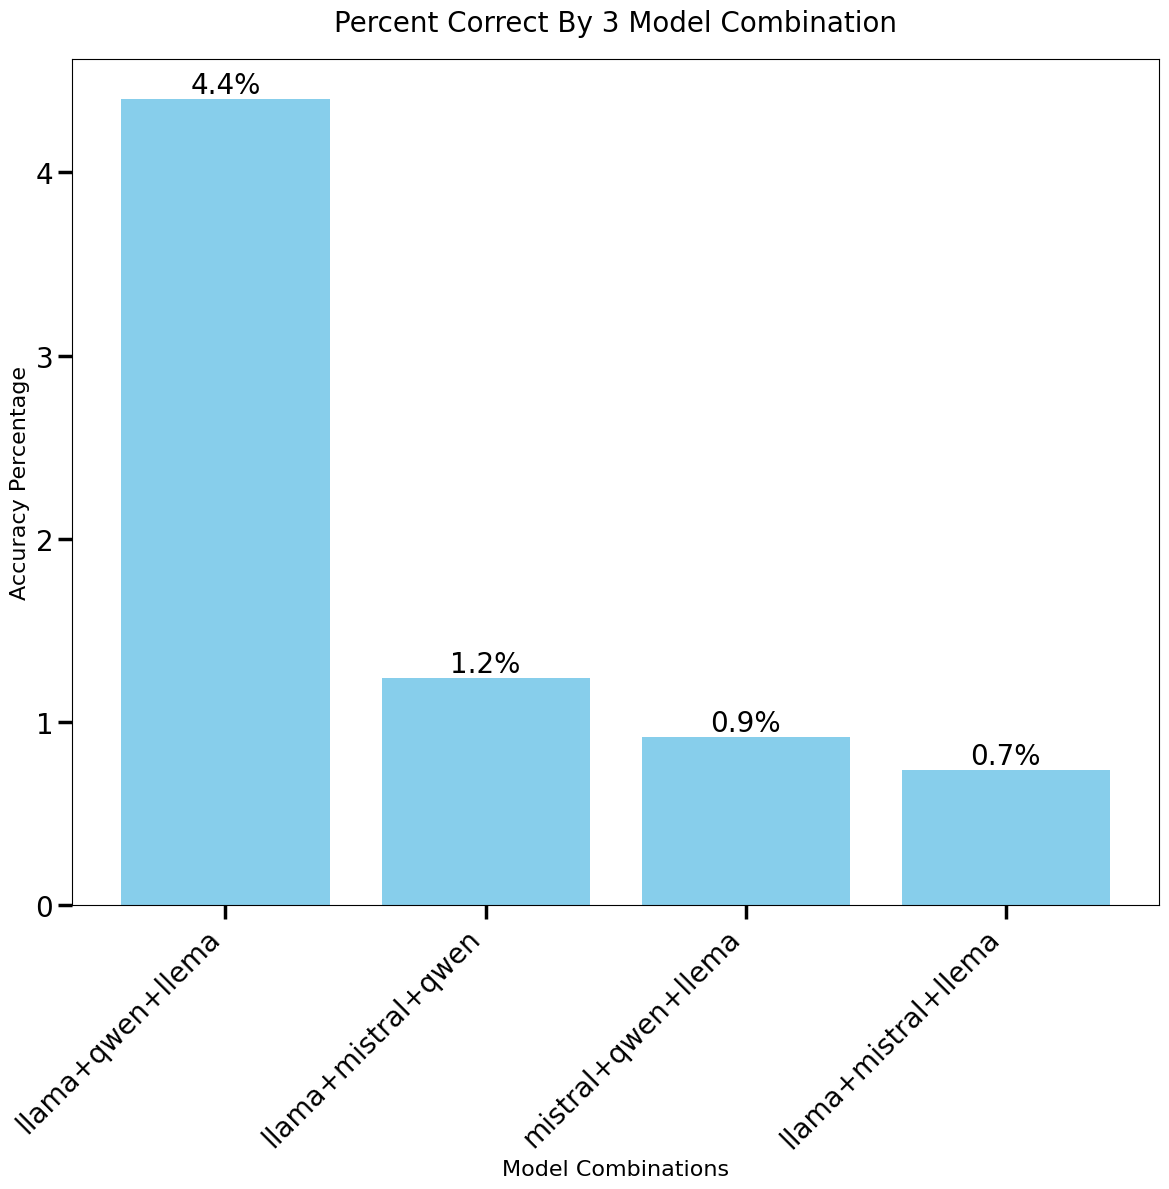

In [7]:
# Trigram combinations:
llama_mistral_qwen = all_results[
    (all_results["llama3_is_correct"] == True) &
    (all_results["mistral_is_correct"] == True) &
    (all_results["qwen_is_correct"] == True)
]

llama_mistral_llema = all_results[
    (all_results["llama3_is_correct"] == True) &
    (all_results["mistral_is_correct"] == True) &
    (all_results["llema_is_correct"] == True)
]

llama_qwen_llema = all_results[
    (all_results["llama3_is_correct"] == True) &
    (all_results["qwen_is_correct"] == True) &
    (all_results["llema_is_correct"] == True)
]

mistral_qwen_llema = all_results[
    (all_results["mistral_is_correct"] == True) &
    (all_results["qwen_is_correct"] == True) &
    (all_results["llema_is_correct"] == True)
]

# Calculate accuracies
accuracies_trigram = pd.DataFrame(
    list(
        zip(
            [len(llama_mistral_qwen), len(llama_mistral_llema), len(llama_qwen_llema), len(mistral_qwen_llema)],
            ["llama+mistral+qwen", "llama+mistral+llema", "llama+qwen+llema", "mistral+qwen+llema"]
        )
    ),
    columns=["correct_count", "combination"]
)

total_sum = len(all_results)
accuracies_trigram["percent"] = (accuracies_trigram["correct_count"] / total_sum) * 100
accuracies_trigram = accuracies_trigram.sort_values(by=['percent'], ascending=False)

# Plot results
fig, ax = plt.subplots(figsize=(12, 12))

bars = plt.bar(accuracies_trigram["combination"], accuracies_trigram["percent"], color="skyblue")

ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=20)

ax.set_title("Percent Correct By 3 Model Combination", fontsize=20, pad=20)
ax.set_xlabel("Model Combinations", fontsize=16)
ax.set_ylabel("Accuracy Percentage", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)
plt.xticks(rotation=45, ha="right")

plt.tight_layout()


In [8]:
print(len(all_results[all_results["at_least_3_correct"]]))

269


In [9]:
print(len(all_results[all_results["at_least_2_correct"]]))

819


In [10]:
print(len(all_results[all_results["at_least_1_correct"]]))

2215


In [11]:
print(len(all_results))

5000


Text(0.5, 0, 'Perent Correct By Each Model')

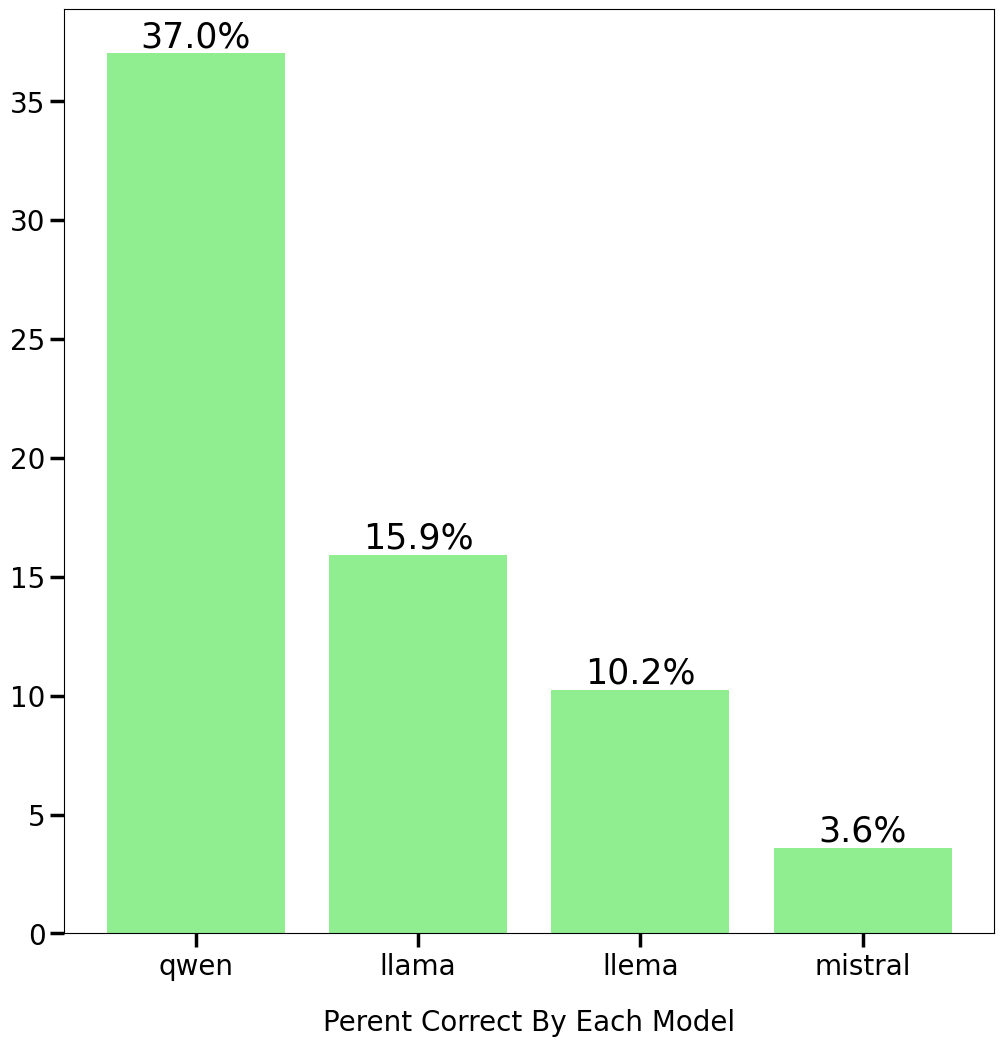

In [12]:
llama = all_results[all_results["llama3_is_correct"] == True]
llema = all_results[all_results["llema_is_correct"] == True]
mistral = all_results[all_results["mistral_is_correct"] == True]
qwen = all_results[all_results["qwen_is_correct"] == True]

accuracies = pd.DataFrame(list(zip([len(llama), len(llema), len(mistral), len(qwen)])))
total_sum = len(all_results)
accuracies.index = ["llama", "llema", "mistral", "qwen"]
accuracies.columns = ["percent"]
accuracies["percent"] = (accuracies["percent"] / total_sum)*100
accuracies = accuracies.sort_values(by=['percent'], ascending=False)

accuracies

fig, ax = plt.subplots(figsize=(12, 12))

bars = plt.bar(accuracies.index, accuracies["percent"], color = "lightgreen")

ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=25)

ax.set_xlabel("Percent Correct By Each Model", labelpad=20)

ax.tick_params(axis='both', which='major', labelsize=20, width=2.5, length=10)

ax.set_xlabel('Perent Correct By Each Model', fontsize=20)



In [13]:
#all_models_questions_got_wrong_competition_math = all_results[all_results#["all_incorrect"]==True]
#all_models_questions_got_wrong_competition_math.to_csv("all_models_questions_got_wrong_competition_math.csv")

In [14]:
all_results["at_least_3_correct"].value_counts()

,count
at_least_3_correct,
False,4731
True,269


In [15]:
def give_ensemble_model_atleast1_piechart():

    ensemble_model_atleast1_correct = pd.DataFrame( all_results['at_least_1_correct'].value_counts() )

    labels = ['Other', 'At least 1 Model Correct']
    sizes = [ ensemble_model_atleast1_correct['count'].iloc[0],ensemble_model_atleast1_correct['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That At Least 1 Model Gave Correct Answers')

    return plt

def give_ensemble_model_atleast2_piechart():

    ensemble_model_atleast2_correct = pd.DataFrame( all_results['at_least_2_correct'].value_counts() )

    labels = ['Other', 'At least 2 Model Correct']
    sizes = [ ensemble_model_atleast2_correct['count'].iloc[0],ensemble_model_atleast2_correct['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That At Least 2 Models Gave Correct Answers')

    return plt


def give_ensemble_model_atleast3_piechart():

    ensemble_model_atleast3_correct = pd.DataFrame( all_results['at_least_3_correct'].value_counts() )

    labels = ['Other', 'At least 3 Model Correct']
    sizes = [ ensemble_model_atleast3_correct['count'].iloc[0],ensemble_model_atleast3_correct['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That At Least 3 Models Gave Correct Answers')

    return plt


def give_ensemble_model_all_incorrect_piechart():

    ensemble_model_all_incorrect = pd.DataFrame( all_results['all_incorrect'].value_counts() )

    labels = ['Other', 'All Incorrect']
    sizes = [ ensemble_model_all_incorrect['count'].iloc[0],ensemble_model_all_incorrect['count'].iloc[1]]
    colors = ['lightgreen', 'red']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That All Models Gave Incorrect Answers')

    return plt




def give_ensemble_model_all_correct_piechart():

    ensemble_model_all_correct = pd.DataFrame( all_results['all_correct'].value_counts() )

    labels = ['Other', 'All Correct']
    sizes = [ ensemble_model_all_correct['count'].iloc[0],ensemble_model_all_correct['count'].iloc[1]]
    colors = ['red', 'lightgreen']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That All Models Gave Correct Answers')

    return plt


def give_ensemble_model_all_agree_piechart():

    ensemble_model_all_agree = pd.DataFrame(all_results["all_agree"].value_counts())

    labels = ['Agree', 'Disagree']
    sizes = [ ensemble_model_all_agree['count'].iloc[0],ensemble_model_all_agree['count'].iloc[1]]
    colors = ['#ff9999', '#66b3ff']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.axis('equal')
    plt.legend()
    plt.title(' Questions That All Models Agreed on vs Disagreed on Answer')

    return plt

def get_competition_math_level_type_distribution():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]

    percent_each_leveltype = percent_each_leveltype.sort_values(by=['Level:Type'], ascending=False)
    percent_each_leveltype

    fig, ax = plt.subplots(figsize=(12, 7))

    bars = plt.barh(percent_each_leveltype.index, percent_each_leveltype["Percent of Level:Type in Dataset"], color = "skyblue")

    ax.bar_label(bars, fmt="%.1f%%", label_type='edge', fontsize=10)

    ax.set_xlabel("Percent of Level:Type", labelpad=10)

    return plt


def get_competition_math_individual_breakdown_all_correct():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]

    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))

        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions))
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions))


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by All Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect by at least 1 Model',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown


def get_competition_math_individual_breakdown_all_incorrect():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]

    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_incorrect"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["all_incorrect"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))

        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions))
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions))


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Incorrect by All Models', 'Total Incorrect', 'Total Incorrect Raw', 'Question #s Correct by at least 1 Model',
    'Total Correct']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Incorrect Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Incorrect Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Incorrect Raw"])
    return individal_question_breakdown


In [16]:
def get_competition_math_individual_breakdown_qwen():
    test_dataset_df["Level:Type"] = test_dataset_df["level"] + ": " + test_dataset_df["type"]
    percent_each_leveltype = pd.DataFrame(test_dataset_df["Level:Type"].value_counts())
    percent_each_leveltype['count'] = round((percent_each_leveltype['count'] / percent_each_leveltype['count'].sum()) * 100, 1)
    percent_each_leveltype.columns = ["Percent of Level:Type in Dataset"]

    level_types = all_results['level:type'].unique()

    all_level_types = []
    questions_right = []
    questions_wrong = []

    percent_questions_right_total = []
    percent_questions_wrong_total = []

    percent_questions_right_total_raw = []

    for cat in level_types:
        right_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["qwen_is_correct"] == True)) ]["row_index"]
        right_string_row_idxquestions = ", ".join(map(str, right_row_indices_of_questions))

        wrong_row_indices_of_questions = all_results[ ((all_results['level:type'] == cat) & (all_results["qwen_is_correct"] == False)) ]["row_index"]
        wrong_string_row_idxquestions = ", ".join(map(str, wrong_row_indices_of_questions))

        all_level_types.append(cat)

        questions_right.append(right_string_row_idxquestions)
        questions_wrong.append(wrong_string_row_idxquestions)

        percent_right = (len(right_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions))
        percent_wrong = (len(wrong_row_indices_of_questions)) / (len(right_row_indices_of_questions) + len(wrong_row_indices_of_questions))


        percent_questions_right_total.append( str(round(percent_right*100)) +"%")
        percent_questions_wrong_total.append( str(round (percent_wrong*100)) + "%" )

        percent_questions_right_total_raw.append(percent_right)


    individal_question_breakdown = pd.DataFrame(list(zip(all_level_types, questions_right, percent_questions_right_total, percent_questions_right_total_raw, questions_wrong, percent_questions_wrong_total)))
    individal_question_breakdown.columns = ['Level:Type', 'Question #s Correct by Llama Models', 'Total Correct', 'Total Correct Raw', 'Question #s Incorrect',
    'Total Incorrect']
    individal_question_breakdown = individal_question_breakdown.merge(percent_each_leveltype, left_on="Level:Type", right_on="Level:Type")
    individal_question_breakdown = individal_question_breakdown.sort_values(by=['Total Correct Raw'], ascending=False)
    individal_question_breakdown = individal_question_breakdown[individal_question_breakdown["Total Correct Raw"] > 0]
    individal_question_breakdown = individal_question_breakdown.drop(columns=["Total Correct Raw"])
    return individal_question_breakdown

qwen_correct = get_competition_math_individual_breakdown_qwen()


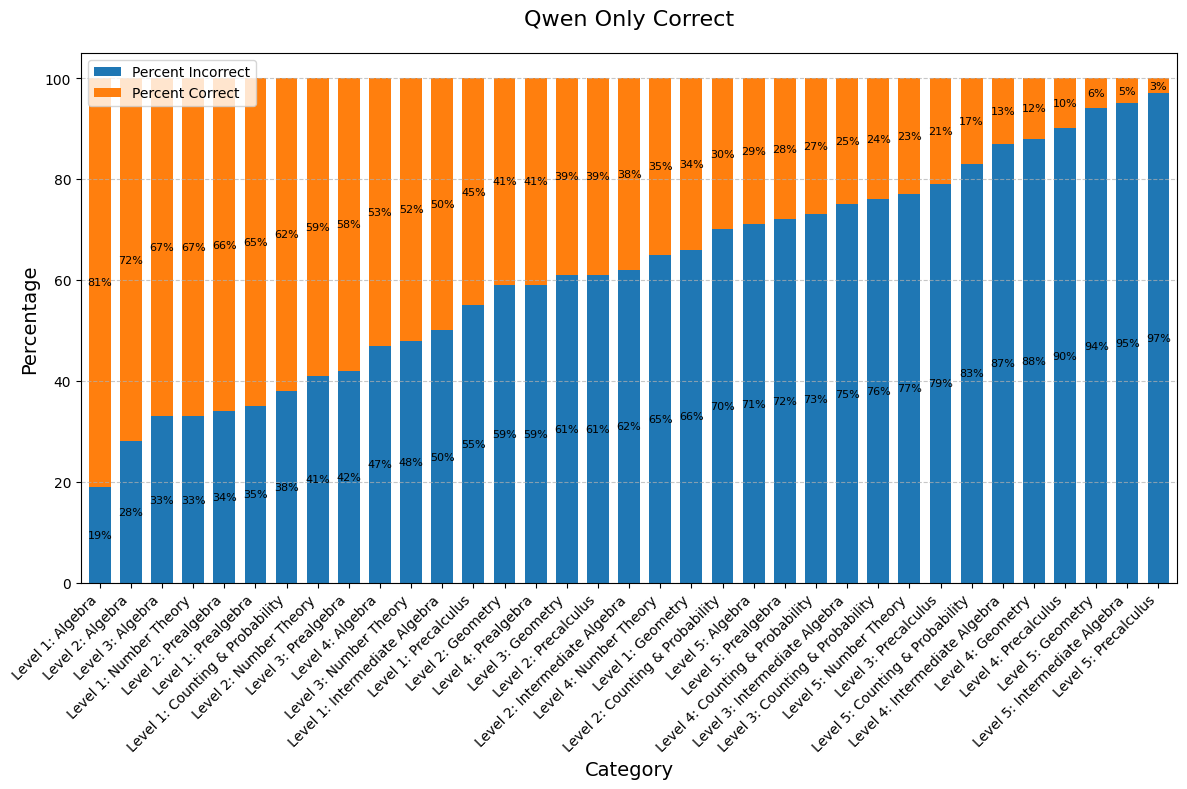

In [17]:
df = qwen_correct
percent_incorrect = [float(p.strip('%')) for p in df["Total Incorrect"]]
percent_correct = [float(p.strip('%')) for p in df["Total Correct"]]
df["Percent Correct"] = percent_correct
df["Percent Incorrect"] = percent_incorrect
df = df[["Level:Type", "Percent Incorrect", "Percent Correct"]]

# Increase figure size and adjust spacing
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust width and height

# Plot stacked bar chart
df.plot.bar(x="Level:Type", stacked=True, ax=ax, width=0.7)  # Adjust width for spacing

# Rotate and align x-axis labels
plt.xticks(rotation=45, ha='right')

# Add bar labels for percentages
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', size=8)

# Adjust title and axis labels for better readability
ax.set_title("Qwen Only Correct", fontsize=16, pad=20)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Category", fontsize=14)

# Add grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything
plt.tight_layout()

# Show plot
plt.show()

In [36]:
# Read the original QWEN file to get full outputs
qwen_df = pd.read_csv(qwen_file_path)

# Get random example of correct QWEN answer
correct_examples = all_results[all_results["qwen_is_correct"] == True].merge(
    test_dataset_df[["row_index", "problem", "solution", "extracted_solution"]],
    on="row_index"
)
correct_example = correct_examples.iloc[np.random.randint(len(correct_examples))]

# Get random example of incorrect QWEN answer
incorrect_examples = all_results[all_results["qwen_is_correct"] == False].merge(
    test_dataset_df[["row_index", "problem", "solution", "extracted_solution"]],
    on="row_index"
)
incorrect_example = incorrect_examples.iloc[np.random.randint(len(incorrect_examples))]

# Get full outputs from original QWEN data
correct_full_output = qwen_df[qwen_df["row_index"] == correct_example["row_index"]]["Output"].iloc[0]
incorrect_full_output = qwen_df[qwen_df["row_index"] == incorrect_example["row_index"]]["Output"].iloc[0]

print("Example where QWEN was correct (Row Index: {}):" .format(correct_example["row_index"]))
print("Problem:", correct_example["problem"])
print("\nQWEN's full output:", correct_full_output)
print("\nQWEN's solution:", correct_example["solution"])
print("\nCorrect answer from dataset:", correct_example["extracted_solution"])

print("\n" + "="*80 + "\n")

print("Example where QWEN was incorrect (Row Index: {}):".format(incorrect_example["row_index"]))
print("Problem:", incorrect_example["problem"])
print("\nQWEN's full output:", incorrect_full_output)
print("\nQWEN's solution:", incorrect_example["solution"])
print("\nCorrect answer from dataset:", incorrect_example["extracted_solution"])

Example where QWEN was correct (Row Index: 1954):
Problem: The width, length, and height of a rectangular prism are each increased by $10\%$. What is the percent increase in the volume of the prism? Express your answer to the nearest whole number.

QWEN's full output: Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

    ### Instruction:
    The input contains a math problem. Carefully solve the problem step-by-step with only logical/mathematical steps. 

    Please provide the answer in the following format: A steps key containing a list of step-by-step calculations and explanations. A final_answer key with the direct answer
    
    ### Input:
    The width, length, and height of a rectangular prism are each increased by $10\%$. What is the percent increase in the volume of the prism? Express your answer to the nearest whole number.

    ### Response:

     {'steps': 'The volu

In [37]:
def analyze_problem(row_index):
    # Get problem details
    problem_info = test_dataset_df[test_dataset_df["row_index"] == row_index].iloc[0]

    # Get model results for this problem
    results = all_results[all_results["row_index"] == row_index].iloc[0]

    print("Problem Analysis for Row Index:", row_index)
    print("="*80)
    print("Problem:", problem_info["problem"])
    print("\nCorrect answer:", problem_info["extracted_solution"])
    print("="*80)

    # Model results
    models = {
        "LLAMA": {
            "correct": results["llama3_is_correct"],
            "answer": results["llama_solution"]
        },
        "LLEMA": {
            "correct": results["llema_is_correct"],
            "answer": results["llema_solution"]
        },
        "QWEN": {
            "correct": results["qwen_is_correct"],
            "answer": results["qwen_solution"]
        },
        "Mistral": {
            "correct": results["mistral_is_correct"],
            "answer": results["mistral_solution"]
        }
    }

    # Print results for each model
    for model_name, data in models.items():
        status = "✓ CORRECT" if data["correct"] else "✗ INCORRECT"
        print(f"\n{model_name}:")
        print(f"Status: {status}")
        print(f"Answer: {data['answer']}")

# Example usage:
# analyze_problem(3056)  # Replace with any row index you want to analyze

In [38]:
analyze_problem(1954)  # Replace with any row index you want to analyze


Problem Analysis for Row Index: 1954
Problem: The width, length, and height of a rectangular prism are each increased by $10\%$. What is the percent increase in the volume of the prism? Express your answer to the nearest whole number.

Correct answer: 33\%

LLAMA:
Status: ✗ INCORRECT
Answer: 30\%

LLEMA:
Status: ✗ INCORRECT
Answer: None

QWEN:
Status: ✓ CORRECT
Answer: 33\%

Mistral:
Status: ✗ INCORRECT
Answer: Error Parsing Response


In [39]:
analyze_problem(1495)  # Replace with any row index you want to analyze


Problem Analysis for Row Index: 1495
Problem: Given 5 colors to choose from, how many ways can we color the four unit squares of a $2\times 2$ board, given that two colorings are considered the same if one is a rotation of the other? (Note that we can use the same color for more than one square.)
[asy]
draw(unitsquare);
draw((.5,0)--(.5,1));
draw((0,.5)--(1,.5));
[/asy]

Correct answer: 165

LLAMA:
Status: ✗ INCORRECT
Answer: 5

LLEMA:
Status: ✗ INCORRECT
Answer: 625

QWEN:
Status: ✗ INCORRECT
Answer: Error Parsing Response

Mistral:
Status: ✗ INCORRECT
Answer: Error Parsing Response
